# PyTorch Workflow 

1. **Getting data ready:**  *data can be almost anything but to get started we're going to create a simple straight line*
2. **Building a model:** *here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop.*
3. **Fitting the model to data (training):** *we've got data and a model, now let's let the model (try to) find patterns in the (training) data.*
4. **Making predictions and evaluating a model (inference):** *our model's found patterns in the data, let's compare its findings to the actual (testing) data.*
5. **Saving and loading a model:** *you may want to use your model elsewhere, or come back to it later, here we'll cover that.*
6. **Putting it all together**

## Imports

In [ ]:
import torch 
from torch import nn 
import matplotlib.pyplot as plt
import numpy as np

`nn` -> contains all of PyTorch's building blocks for neural networks

https://pytorch.org/docs/stable/nn.html?highlight=torch+nn#module-torch.nn

## 1. Data preparing and loading

To showcase this, we create some *know* data using linear regression formula (𝑌 = a + b𝐗).
We will use a linear regresion formula to make a straight line know **parameters**.


In [ ]:
# Create *known* parameters

weight = 0.7 # b
bias = 0.3 # a

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1) # also we add extra dimension
y = weight * X + bias # Y = a + bX

print(f'Input: {X[:10]}')
print(f'Output: {y[:10]}')

Input: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
Output: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [ ]:
len(X), len(y)

(50, 50)

### Spliting data into training and test sets (one of the most important concepts in ML)

* Training set - to train our model (**always**)
* Validation set - to tune model patterns (**often but not always**)
* Test set - to see if the model is redy (**always**)

**Generalization:** *the ability for a ML model to perform well on data it hasn't seen before.*

Also we can use scikit-learn for spliting data

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Better data visualisation.

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data') 

  # Plot test data in red
  plt.scatter(test_data, test_labels, c='#8a2be2', s=4, label='Test data')

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # Show the legend
  plt.legend(prop={'size': 14}) 


`matplotlib.pyplot.scatter` - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib-pyplot-scatter

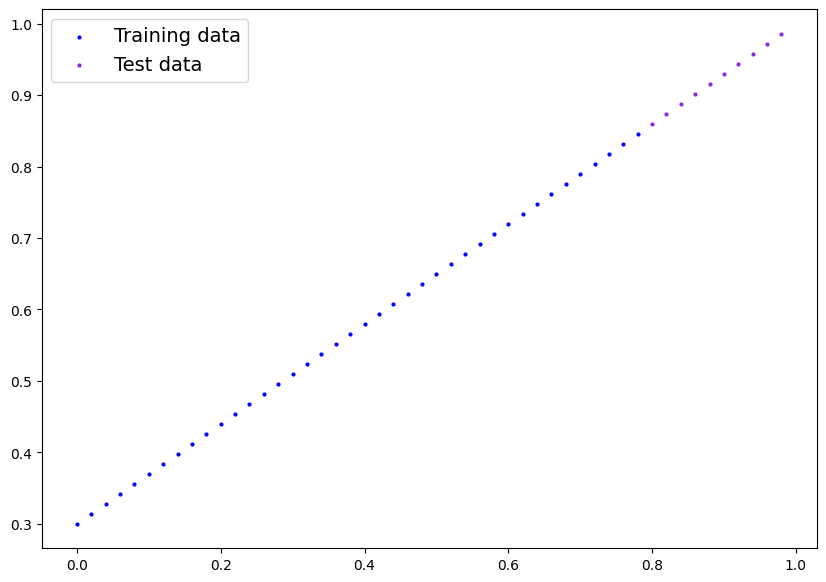

In [ ]:
plot_predictions()

## 2. Building model

What our model does:
* Start with random values (weights, bias)
* Look at training data the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create data)


It does it through two main alghoritms: 
1. Gradient descent (when ` requires_grad=True`) - 
https://en.wikipedia.org/wiki/Gradient_descent
  *Gradient descent is like a game where you have to find a hidden treasure on a mountain. You start at the top of the mountain and take small steps downhill, trying to get closer to the treasure. Each step you take depends on the steepness of the slope and how big your feet are (the learning rate). The goal is to reach the bottom of the mountain, where the treasure is hidden. Similarly, gradient descent helps a machine learning model find the best settings (weights) by taking small steps downhill in the direction of the steepest slope (gradient) until it reaches the lowest point (minimum) of the cost function.*


2. Backpropagation - 
https://en.wikipedia.org/wiki/Backpropagation

  *Backpropagation is like a teacher who helps a student learn how to solve a math problem. The teacher gives the student feedback on what they did wrong and helps them correct their mistakes. Similarly, backpropagation helps a machine learning model learn from its mistakes by calculating how much it got wrong and adjusting its internal settings (weights) so that it can do better next time.*


More details about:
* `torch.nn.Module` - https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=torch+nn+module#torch.nn.Module

* `nn.Parameter` - https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html

In [ ]:
# Create a linear regression model class
class LinearRegessionModel(nn.Module): # hint: almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, # - starts with a random weight and try to adjust in to the ideal weight
                                           requires_grad=True, # - can this parameter be updated via gradinet descent
                                           dtype=torch.float)) # - datatype torch.float32

    self.bias =  nn.Parameter(torch.rand(1, # - starts with a random bias and try to adjust in to the ideal bias
                                         requires_grad=True, # - can this parameter be updated via gradinet descent
                                           dtype=torch.float)) # - datatype torch.float32

  # Forward method to define the computation in the model 
  def forward(self, x: torch.Tensor) -> torch.Tensor: # 'x' is the input data
    # What computation is happening in our model:
    return self.weights * x + self.bias # linear regression formula, same formula used to create our data



### PyTorch model building essentials

* `torch.nn` - contains all of the buildings for computional graphs (a neural network can be considered a computional graph).
* `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from `torch.nn` will set these for us.
* `torch.nn.Module` - the base class for all neural network modules, if you subclasses it, you should overwirte `forward`.
* `torch.optim` - this where the optimazers in PyTorch live, they will help with gradient descent.
* `def forward()` - all `nn.MOdule` sublclases requierd you to overwrite `forward()`, this method defines what happens in the forward computation.

### Checking the contents of our PyTorch model

We can check our model parameters ot what's inside our model using `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model 
model_0 = LinearRegessionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Making predictions using `torch.inference_model()`

To check our model' predictive poweer, we gonna se how well it predicts `y_test` based on `X_test`.

When we pass fata trrough our model, it's going to run it through the `forward()` method.

In [ ]:
# Make prediction with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# Something similar, however `inference_mode()` is prefered
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

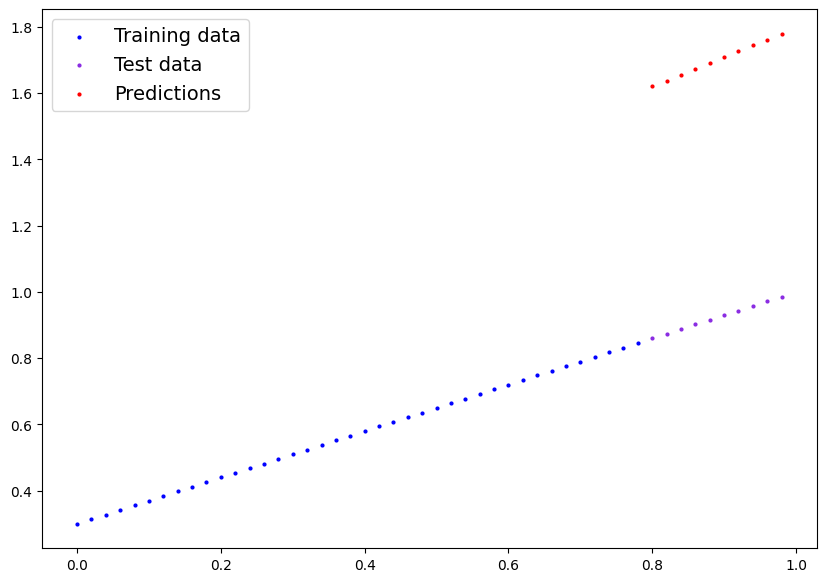

In [ ]:
plot_predictions(predictions=y_preds)

Our predictions are far from the actual values because we start with random parameters which are diffrent with our *known* parameters (`weights`=0.8823, `bias`=0.9150).

## 3. Train model 
The whole idea of training a model to move from som unknown parameters(these may be random) to some *known* parameters.

Or the other words from poor data representation to a better one.

To measure how wrong our models predictions are is to use loss function.

* **Note:** Loss function may also be called cost function or criterion in different areas.

Things we need to train:

* **Loss function:** a funkcion to measure how wrong your model's predictions are to ideal outputs.
  * `nn.L1Loss` (MSE - Mean Squared Error): This loss function is used for regression problems, where the goal is to predict a continuous output. It is useful when the output values have a wide range.



* **Optimizer:** takes into account the loss of a model and adjust the model's parameters to improve the loss function.
  * Inside the optimizer we often set two parameters:
    * `params` - the model parameters we'd like to otimize, for example `params=model.parameters()`
    * `lr` (learning rate) - the learning rate is a hyper parameter that defines how big/small the optimizer changes the parameters with each step (small `lr` results in small changes, big `lr` results in big changes) for example `lr=0.001`

  * `torch.optim.SGD` (SGD - Stochastic Gradient Descent): This is the most basic optimizer used for updating the weights of a neural network. It is used when you have a large dataset and a simple model architecture.
  * `torch.optim.Adam` Adam: This optimizer combines the benefits of Adagrad and RMSprop. It is used when you have a large dataset and complex model architecture.


And specifically for PyTorch, we need:
* A training loop
* A testing loop


In [ ]:
# Check out our model's parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Seting up loss function and optimizer

In [ ]:
# Setup a loss function 
loss_fn = nn.L1Loss()

# Setup a optimizer (SGD - stochastic gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(), 
                            lr = 0.001) # lr = learning rate - possibly the most important hyperparameter you can set

### Building training and testing loop with PyTorch

Things we need in training loop:
0. **Loop through the data**.
1. **Forward pass** (this involves data moving through our model's `forward()` function) to make prediction on data - forward propagation.
2. **Calculate the loss** ( compare forward pass predictions to ground truth labels).
3. **Optimizer zero grad** - by default how the optimizer changes will accumulate through the loop, so we have to zero them for tne next iteration of the loop
4. **Loss backwards** - move backwards through the network to caltulate the gradients of a each parameters our model with respect to the loss (`backpropagation`).
5. **Optimizer step** - use the optimizer to adjust our model's parameters to try and improve the loss (`gradient descent`).

### **Training model steps**

### Preparation:
1. Setup `manual_seed`
2. Setup `epochs`
3. Setup list to track values

### Training
0. Set a loop
1. Forward pass 
2. Calculate the loss
3. Optimizer zero grad
4. Perform backpropagation 
5. Step the optimizer

### Testing 
1. Do a forward pass
2. Calculate the test loss
3. Print info

  

### Song
To remember these steps better there's a song 🙃

*Let’s train!*

*For an epoch in a range*

*Call model dot train*

*Do the forward pass*

*Calculate the loss*

*Optimizer zero grad*

*Lossssss backward*

*Optimizer step step step*

*Test time!*

*Call model dot eval*

*With torch inference mode,*

*Do the forward pass*

*Calculate the loss*

*Print out what’s happenin’*

*Let’s do it again ‘gain ‘gain*

Full song here: https://www.youtube.com/watch?v=Nutpusq_AFw


In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data (this is a pyperparameter because we set it ourselves)
epochs = 1000

# Track different values
epoch_count =[]
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data:
for epoch in range(epochs):
  # Set the model to training mode (this is the default state of a model)
  # Even if it's default, it's a good habit to writ it 
  model_0.train() # train mode in PyTorch set all parameters that required gradients to require gradients

  # 1. Forward pass (To remember how to write this step ask question 
  #                  Q: Where do I have forward function? 
  #                  A: Inside the model!!)
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)


  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() 

  ### Testing 
  model_0.eval() # turns off different settings in the model not needet for evaluation testing (dropout /batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking and a couple more things behind scenes
    # 1. Do a forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the test loss
    test_loss = loss_fn(test_pred, y_test)
  
  # Printing out info
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')
    # Printing out model state_dict()
    print(model_0.state_dict())









Epoch: 0 | Loss: 0.6860889196395874 | Test loss: 0.775876522064209
OrderedDict([('weights', tensor([0.8819])), ('bias', tensor([0.9140]))])
Epoch: 10 | Loss: 0.6745680570602417 | Test loss: 0.7624056935310364
OrderedDict([('weights', tensor([0.8780])), ('bias', tensor([0.9040]))])
Epoch: 20 | Loss: 0.6630472540855408 | Test loss: 0.7489349246025085
OrderedDict([('weights', tensor([0.8741])), ('bias', tensor([0.8940]))])
Epoch: 30 | Loss: 0.6515263915061951 | Test loss: 0.7354640960693359
OrderedDict([('weights', tensor([0.8702])), ('bias', tensor([0.8840]))])
Epoch: 40 | Loss: 0.6400055885314941 | Test loss: 0.7219933271408081
OrderedDict([('weights', tensor([0.8663])), ('bias', tensor([0.8740]))])
Epoch: 50 | Loss: 0.6284847259521484 | Test loss: 0.7085224986076355
OrderedDict([('weights', tensor([0.8624])), ('bias', tensor([0.8640]))])
Epoch: 60 | Loss: 0.6169638633728027 | Test loss: 0.6950516104698181
OrderedDict([('weights', tensor([0.8585])), ('bias', tensor([0.8540]))])
Epoch: 7

In [ ]:
# Plot the loss curves
def loss_curves(epoch_count, loss_values, test_loss_values):
  plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
  plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label='Test loss')
  plt.title('Training and testing los curves')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  return plt 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

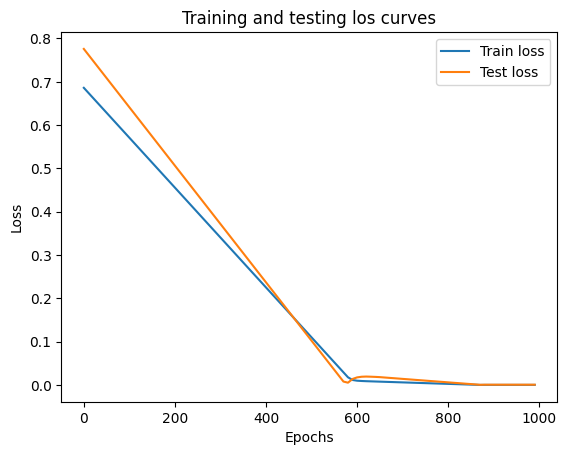

In [ ]:
# Presenting loss curves
loss_curves(epoch_count, loss_values, test_loss_values)

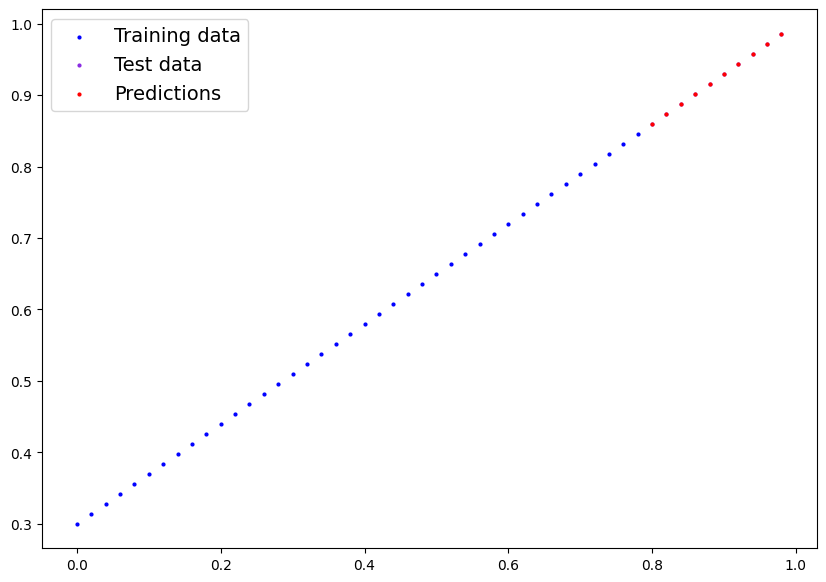

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

## 4. Saving a model in PyTorch

There is a method we can use to saving and loading models in PyTorch:
1. `torch.save()` - allows to save a PyTorch object in [Python's pickle](https://docs.python.org/3/library/pickle.html) format.


https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [ ]:
# Saving our PyTorch model 
from pathlib import Path

# 1. Create model's directory 
MODEL_PATH = Path('/content/models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), 
           f=MODEL_SAVE_PATH) 


Saving model to: /content/models/01_pytorch_model_0.pth


## 5. Loading a saved PyTorch model

To perform that we can use:
1. `torch.load()` - allows to load a saved PyTorch object.
2. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary.

Since we saved our model's `state_dict()` rather than entire moedel, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
# To load in a saved state_dict we have to instantiase a new instance of our model class
loaded_model = LinearRegessionModel()

# Load the saved state dict of a model (this will update the new instance with updated parameters)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# Printing out state_dict of models
print(f'Saved moedel: {model_0.state_dict()}')
print(f'Loaded moedel: {loaded_model.state_dict()}')

if model_0.state_dict() == loaded_model.state_dict(): print('Loaded model is matching with saved one!')

Saved moedel: OrderedDict([('weights', tensor([0.6995])), ('bias', tensor([0.2999]))])
Loaded moedel: OrderedDict([('weights', tensor([0.6995])), ('bias', tensor([0.2999]))])
Loaded model is matching with saved one!


In [ ]:
# Make some model predictions 
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8595],
        [0.8735],
        [0.8875],
        [0.9015],
        [0.9154],
        [0.9294],
        [0.9434],
        [0.9574],
        [0.9714],
        [0.9854]])

In [ ]:
# Make some predictions with our loaded model 
loaded_model.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

loaded_model_preds

tensor([[0.8595],
        [0.8735],
        [0.8875],
        [0.9015],
        [0.9154],
        [0.9294],
        [0.9434],
        [0.9574],
        [0.9714],
        [0.9854]])

In [ ]:
# Comparing loaded preds with orginal model preds
y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting all together 

### Imports

In [ ]:
import torch 
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

### Creating decide-agnostic code

*If we have acces to a GPU, our code will use it.* 

*If GPU is not available, the code will default to useing CPU*

In [ ]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device}')

if device == 'cuda': 
  !nvidia-smi

Using cuda
Sat Apr 15 14:14:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    13W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                             

### Data

In [ ]:
# Create some data using in linear regression formula of y = weight * X + bias
weight = 0.1
bias = 0.4

# Create range of values
start = 0
end = 1
step = 0.001

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # Warning: remember to unsqueeze, preventing error
y = weight * X + bias

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data') 

  # Plot test data in red
  plt.scatter(test_data, test_labels, c='#8a2be2', s=4, label='Test data')

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # Show the legend
  plt.legend(prop={'size': 14}) 

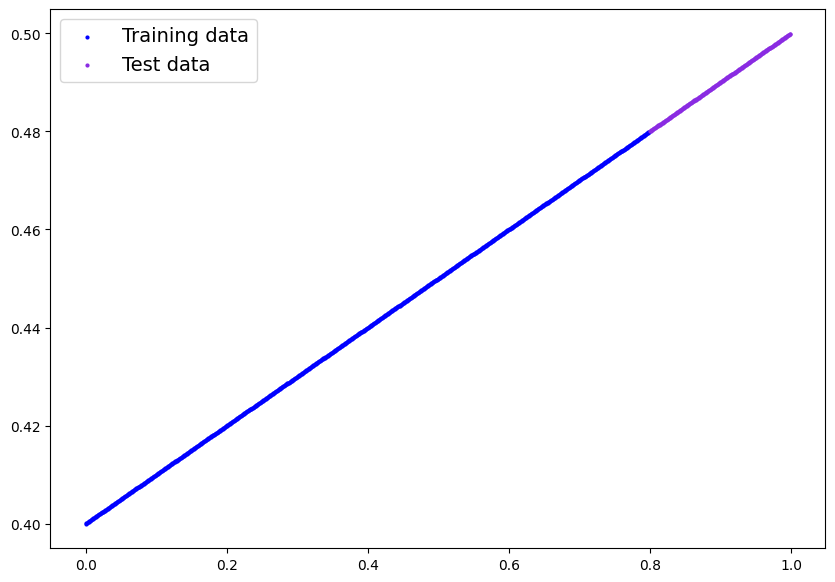

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

### Building PyTorch linear model

In [ ]:
# Create linear regression model
class NewLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Use `nn.Linear()` to create the model parameters - https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=torch+nn+linear#torch.nn.Linear
    self.linear_layer = nn.Linear(in_features=1, 
                                  out_features=1) 

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set manual seed
torch.manual_seed(42)

# Class initialization
model_1 = NewLinearRegressionModel()
model_1,  model_1.state_dict()

(NewLinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device 
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training 
For training we need: 
1. Loss function 
2. Optimizer 
3. Training loop
4. Testing loop

#### Loss function

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss() # MAE

#### Optimizer

In [ ]:
# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

#### Training/Testing loop

In [ ]:
### Preparation
# Setup manual seed
torch.manual_seed(42)

# Setup epochs
epochs = 5000

# Tracking values
epoch_count = []
loss_values = []
test_loss_values =[]

### TRAIN
for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_preds = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_preds, y_train)

  # 3. Optimizer zero grand
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### TEST
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_1(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_pred, y_test)

    # 3. Printing what' happening
    if epoch % 100 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')



Epoch: 0 | Loss: 0.6954910159111023 | Test loss: 1.0264010429382324
Epoch: 100 | Loss: 0.5795335173606873 | Test loss: 0.8904699683189392
Epoch: 200 | Loss: 0.46357589960098267 | Test loss: 0.7545388340950012
Epoch: 300 | Loss: 0.3476184010505676 | Test loss: 0.618607759475708
Epoch: 400 | Loss: 0.2316608428955078 | Test loss: 0.4826766848564148
Epoch: 500 | Loss: 0.13659553229808807 | Test loss: 0.35891926288604736
Epoch: 600 | Loss: 0.09723494946956635 | Test loss: 0.27652615308761597
Epoch: 700 | Loss: 0.08231397718191147 | Test loss: 0.22578170895576477
Epoch: 800 | Loss: 0.07572188973426819 | Test loss: 0.19518622756004333
Epoch: 900 | Loss: 0.07153525948524475 | Test loss: 0.17603445053100586
Epoch: 1000 | Loss: 0.06795249879360199 | Test loss: 0.1628427654504776
Epoch: 1100 | Loss: 0.06450457125902176 | Test loss: 0.15255607664585114
Epoch: 1200 | Loss: 0.061083611100912094 | Test loss: 0.14358234405517578
Epoch: 1300 | Loss: 0.057667315006256104 | Test loss: 0.13518184423446655

In [ ]:
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.1005]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4004], device='cuda:0'))])

In [ ]:
# Plot the loss curves
def loss_curves(epoch_count, loss_values, test_loss_values):
  plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
  plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label='Test loss')
  plt.title('Training and testing los curves')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  return plt 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

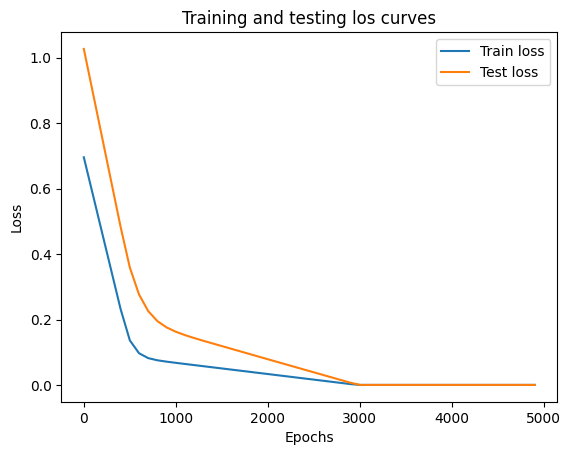

In [ ]:
loss_curves(epoch_count, loss_values, test_loss_values)

### Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test model
with torch.inference_mode():
  y_preds = model_1(X_test)

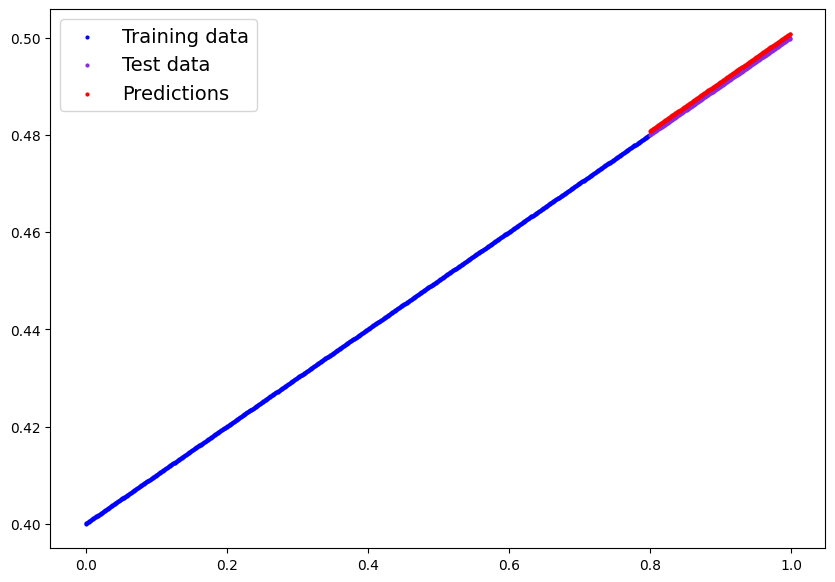

In [ ]:
# Visualise model predictions
plot_predictions(predictions=y_preds.cpu()) 

### Saving and loading our model

In [ ]:
from pathlib import Path

# Create model's directory 
MODEL_PATH = Path('/content/models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = '01_pytorch_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(), 
           f=MODEL_SAVE_PATH) 


Saving model to: /content/models/01_pytorch_model_1.pth


In [ ]:
# Load a PyTorch model
loaded_model_1 = NewLinearRegressionModel()

# Load the saved state dict of a model
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put the laded model to device
loaded_model_1.to(device)

NewLinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.1005]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4004], device='cuda:0'))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_y_pred = loaded_model_1(X_test)

y_preds == loaded_y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        

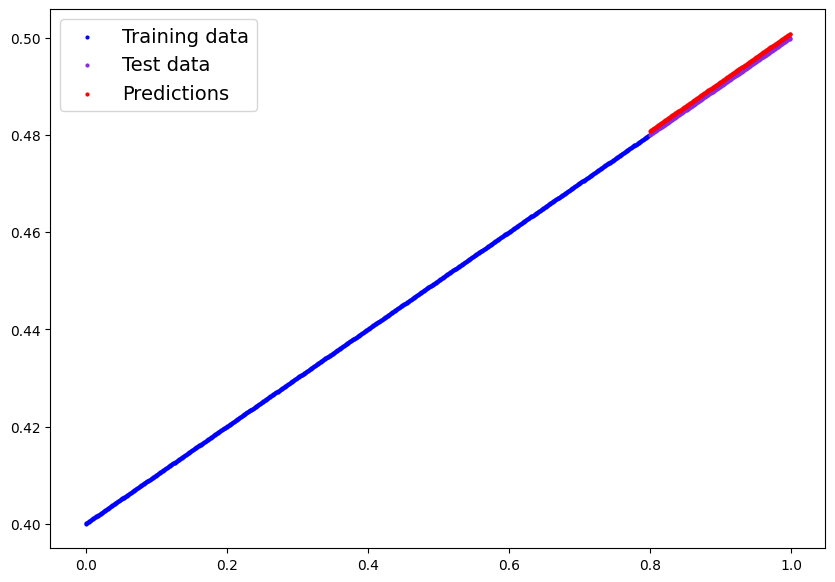

In [ ]:
plot_predictions(predictions=loaded_y_pred.cpu())